Requirements

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, BatchNormalization, MaxPooling2D, UpSampling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam, SGD, RMSprop
import cv2
import matplotlib.pyplot as plt
import numpy as np

Problem

In [2]:
import cv2
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2)

aug = datagen.flow(train_images, train_labels, batch_size=train_images.shape[0])
train_images = np.concatenate((train_images, aug[0][0]), axis=0)
train_labels = np.concatenate((train_labels, aug[0][1]), axis=0)

# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

# Convert RGB images to grayscale using OpenCV
train_images_gray = []
for img in train_images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    train_images_gray.append(gray)

test_images_gray = []
for img in test_images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    test_images_gray.append(gray)

train_images_gray = np.array(train_images_gray)
test_images_gray = np.array(test_images_gray)


# Convert the labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 [==============================] - 4s 0us/step


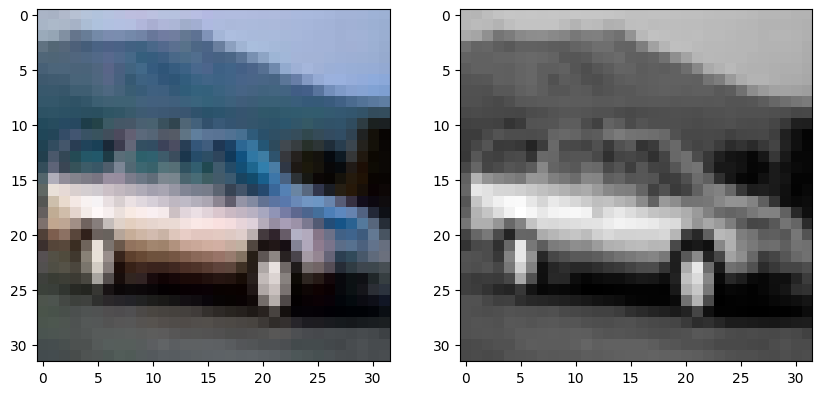

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(train_images[4], cmap='gray')
axs[1].imshow(train_images_gray[4], cmap='gray')
plt.show()

In [13]:
# Define the autoencoder model
model = Sequential()

# Encoder layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Decoder layers
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_181 (Conv2D)         (None, 32, 32, 32)        320       
                                                                 
 conv2d_182 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_183 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_184 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

In [14]:
hist = model.fit(train_images_gray, train_images, epochs=50, batch_size=32, validation_data=(test_images_gray, test_images))

Epoch 1/50
3125/3125 [==============================] - 35s 10ms/step - loss: 0.0211 - val_loss: 0.0176
Epoch 2/50
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0149 - val_loss: 0.0153
Epoch 3/50
3125/3125 [==============================] - 30s 10ms/step - loss: 0.0132 - val_loss: 0.0145
Epoch 4/50
3125/3125 [==============================] - 30s 10ms/step - loss: 0.0123 - val_loss: 0.0131
Epoch 5/50
3125/3125 [==============================] - 30s 10ms/step - loss: 0.0115 - val_loss: 0.0123
Epoch 6/50
3125/3125 [==============================] - 30s 10ms/step - loss: 0.0109 - val_loss: 0.0119
Epoch 7/50
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0105 - val_loss: 0.0113
Epoch 8/50
3125/3125 [==============================] - 30s 10ms/step - loss: 0.0101 - val_loss: 0.0110
Epoch 9/50
3125/3125 [==============================] - 30s 10ms/step - loss: 0.0098 - val_loss: 0.0109
Epoch 10/50
3125/3125 [==============================] - 30s 10m

1/1 [==============================] - 1s 829ms/step


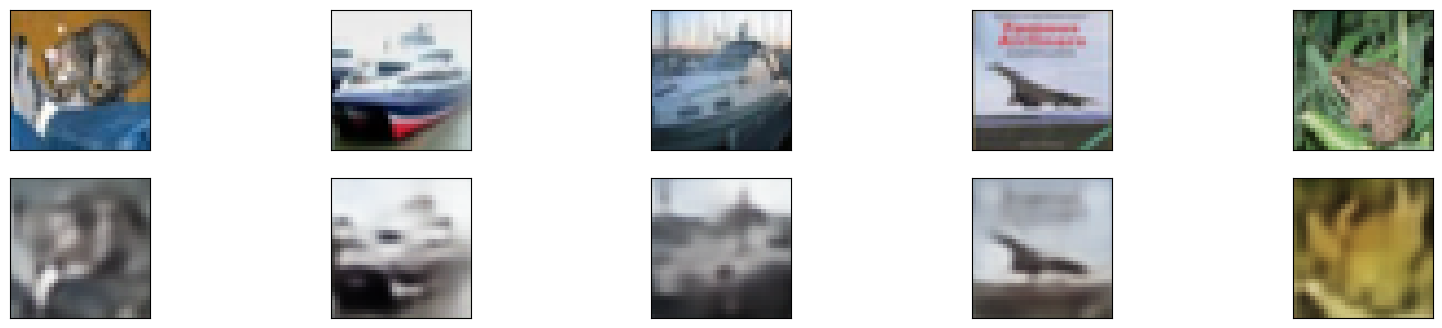

1/1 [==============================] - 1s 947ms/step


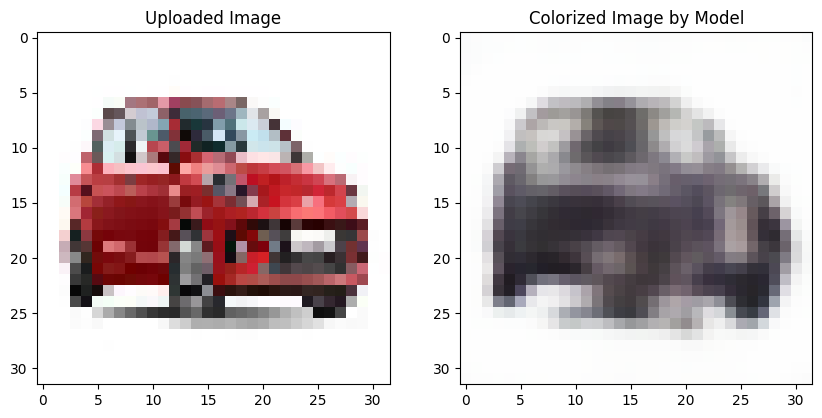

In [16]:
# Load desire image
image = cv2.imread('car.jpg')
image = cv2.resize(image,(32, 32))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Preprocess on input image
gray_image = cv2.resize(gray_image,(32, 32))
img = gray_image.reshape(1, 32, 32, 1)
img = img.astype('float32')/255.

# Prediction
prediction_img = model.predict(img)
prediction_img = prediction_img.reshape(32, 32, 3)

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Uploaded Image')
axs[1].imshow(prediction_img, cmap='gray')
axs[1].set_title('Colorized Image by Model')
plt.show()